In [1]:
import kagglehub
path = kagglehub.dataset_download("sahilislam007/shopping-trends-and-customer-behaviour-dataset")
print("path to dataset files: ", path)

path to dataset files:  /kaggle/input/shopping-trends-and-customer-behaviour-dataset


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(path + "/Shopping Trends And Customer Behaviour Dataset.csv")

In [3]:
# Data Overview
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Information About 15,000+ job listings from 50+ countries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# Shape of Data
df.shape

(3900, 18)

In [6]:
# Descriptive Analysis
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Check Null
df.isna().sum()

,0
Unnamed: 0,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Color,0
Season,0


In [9]:
# Drop Column Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Age Classification
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,55,55-64
1,19,18-24
2,50,45-54
3,21,18-24
4,45,45-54


In [11]:
# Customer Ages Distribution
df.AgeGroup.value_counts().reset_index()

,AgeGroup,count
0,25-34,755
1,45-54,752
2,55-64,751
3,35-44,729
4,18-24,486
5,65+,427


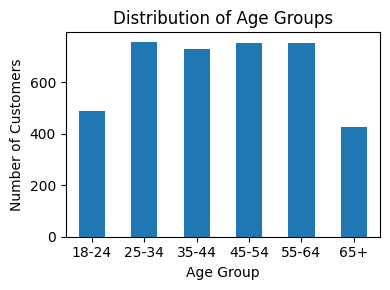

In [12]:
age_group_counts = df['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(4, 3))
age_group_counts.plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Customer's Gender Distribution
df.Gender.value_counts().reset_index()

,Gender,count
0,Male,2652
1,Female,1248


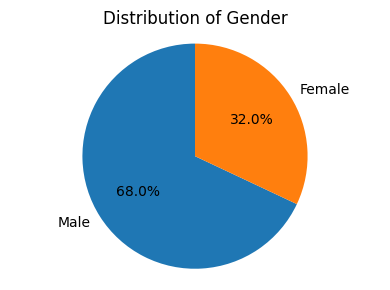

In [14]:
# Gender Visualization
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [15]:
# Purchased Items Distribution
df['Item Purchased'].value_counts().reset_index().head()

,Item Purchased,count
0,Blouse,171
1,Pants,171
2,Jewelry,171
3,Shirt,169
4,Dress,166


In [16]:
# Purchased Items Categories Distribution
df.Category.value_counts().reset_index()

,Category,count
0,Clothing,1737
1,Accessories,1240
2,Footwear,599
3,Outerwear,324


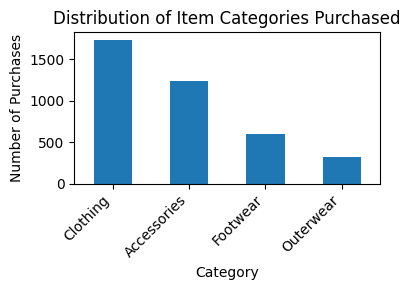

In [17]:
# Categories Visualization
category_counts = df['Category'].value_counts()
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar')
plt.title('Distribution of Item Categories Purchased')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Purchasing Locations Distribution
df.Location.value_counts().reset_index().head()

,Location,count
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89


In [19]:
# Items Colors Distribution
df.Color.value_counts().reset_index().head()

,Color,count
0,Olive,177
1,Yellow,174
2,Silver,173
3,Teal,172
4,Green,169


In [20]:
# Purchasing Seasons Distribution
df.Season.value_counts().reset_index()

,Season,count
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


In [21]:
# Review Rating Groups
bins = [0, 1, 2, 3, 4, 5]
labels = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']

df['RatingGroup'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=True, include_lowest=True)

df[['Review Rating', 'RatingGroup']].head()

,Review Rating,RatingGroup
0,3.1,4 Stars
1,3.1,4 Stars
2,3.1,4 Stars
3,3.5,4 Stars
4,2.7,3 Stars


In [22]:
# Review Rating Groups Distribution
df.RatingGroup.value_counts().reset_index()

,RatingGroup,count
0,4 Stars,1590
1,5 Stars,1463
2,3 Stars,847
3,1 Star,0
4,2 Stars,0


In [23]:
# Subscription to a Membership Plan Distrubtion
df['Subscription Status'].value_counts().reset_index()

,Subscription Status,count
0,No,2847
1,Yes,1053


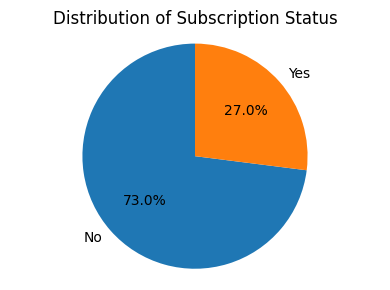

In [24]:
# Subscription Visualization
subscription_counts = df['Subscription Status'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Subscription Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [25]:
# Shipping Type Distribution
df['Shipping Type'].value_counts().reset_index()

,Shipping Type,count
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


In [26]:
# Discount Applied Distribution
df['Discount Applied'].value_counts().reset_index()

,Discount Applied,count
0,No,2223
1,Yes,1677


In [27]:
# Promo Code Used
df['Promo Code Used'].value_counts().reset_index()

,Promo Code Used,count
0,No,2223
1,Yes,1677


In [28]:
# Confirming they are Identical
(df['Discount Applied'] == df['Promo Code Used']).all()

np.True_

In [29]:
# Drop Promo Code Used
df.drop('Promo Code Used', axis=1, inplace=True)

In [30]:
# Previous Purchases Distribution
df['Previous Purchases'].value_counts().reset_index().head()

,Previous Purchases,count
0,31,97
1,21,96
2,14,92
3,4,91
4,3,91


In [31]:
# Payment Method Distribution
df['Payment Method'].value_counts().reset_index()

,Payment Method,count
0,PayPal,677
1,Credit Card,671
2,Cash,670
3,Debit Card,636
4,Venmo,634
5,Bank Transfer,612


In [32]:
# Frequecy of Purchases Distribution
df['Frequency of Purchases'].value_counts().reset_index()

,Frequency of Purchases,count
0,Every 3 Months,584
1,Annually,572
2,Quarterly,563
3,Monthly,553
4,Bi-Weekly,547
5,Fortnightly,542
6,Weekly,539


In [33]:
# Replace Replace "Bi-Weekly" with "Fortnightly", Replace "Every 3 Months" with "Quarterly"
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace({
    'Bi-Weekly': 'Fortnightly',
    'Every 3 Months': 'Quarterly'
})

In [34]:
# Numerical representation of the Frequency of Purchases
frequency_mapping = {
    'Weekly': 7,
    'Fortnightly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Annually': 365
}

df['Purchase_Frequency_Days'] = df['Frequency of Purchases'].map(frequency_mapping)

In [35]:
df['Frequency of Purchases'].value_counts().reset_index()

,Frequency of Purchases,count
0,Quarterly,1147
1,Fortnightly,1089
2,Annually,572
3,Monthly,553
4,Weekly,539


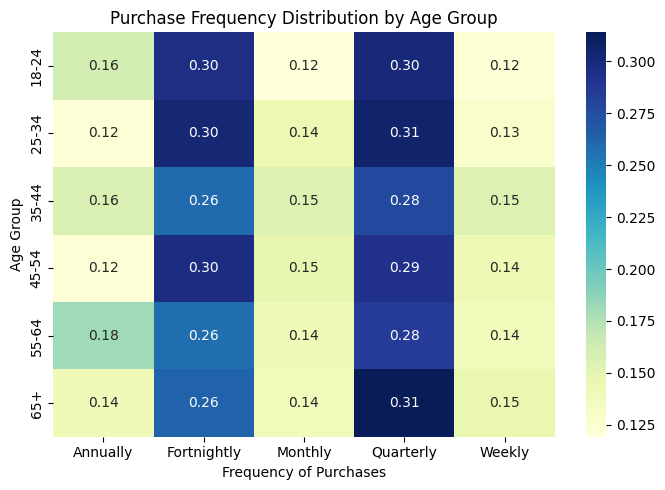

In [36]:
# Purchase Frequency Distribution Across Age Groups
pivot = pd.crosstab(df['AgeGroup'], df['Frequency of Purchases'], normalize='index')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Purchase Frequency Distribution by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Frequency of Purchases')
plt.tight_layout()
plt.show()

<Figure size 300x200 with 0 Axes>

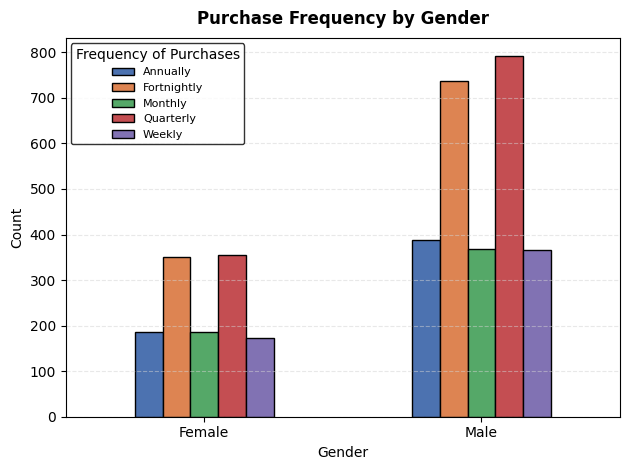

In [37]:
# Purchase Frequency by Gender
pivot = pd.crosstab(df['Gender'], df['Frequency of Purchases'])
plt.figure(figsize=(3, 2))
pivot.plot(kind='bar', color=sns.color_palette('deep', n_colors=len(pivot.columns)), edgecolor='black')
plt.title('Purchase Frequency by Gender', fontsize=12, pad=10, fontweight='bold')
plt.ylabel('Count', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Frequency of Purchases', fontsize=8, loc='best', frameon=True, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#D3D3D3')
plt.tight_layout()
plt.show()

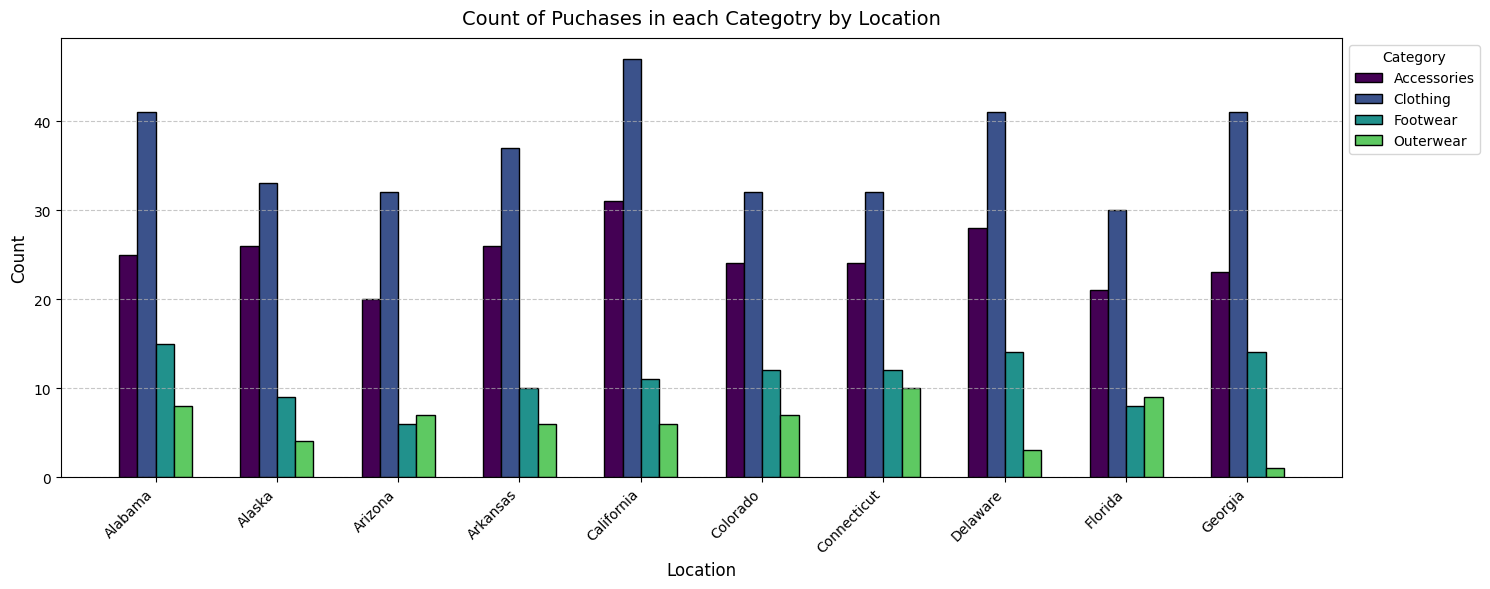

In [38]:
# Count of Puchases in each Categotry by Location
pivot = pd.crosstab(df['Location'], df['Category']).head(10)
plt.figure(figsize=(15, 6))
bar_width = 0.15
x = range(len(pivot.index))
for i, column in enumerate(pivot.columns):
    plt.bar([pos + i * bar_width for pos in x], pivot[column], width=bar_width, label=column,
            edgecolor='black', color=plt.cm.viridis(i / len(pivot.columns)))
plt.title('Count of Puchases in each Categotry by Location', fontsize=14, pad=10)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks([pos + bar_width * (len(pivot.columns) - 1) / 2 for pos in x], pivot.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10, frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

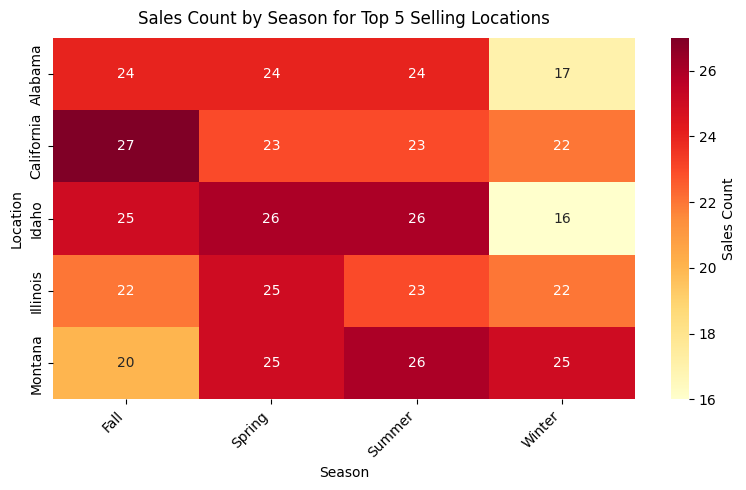

In [39]:
# Sales by Season for Top Selling Locations
sales_by_location = df.groupby(['Location', 'Season']).size().reset_index(name='Sales Count')
total_sales_by_location = sales_by_location.groupby('Location')['Sales Count'].sum().reset_index()
top_5_locations = total_sales_by_location.nlargest(5, 'Sales Count')['Location']
pivot = pd.crosstab(df[df['Location'].isin(top_5_locations)]['Location'], df['Season'])
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Sales Count'})
plt.title('Sales Count by Season for Top 5 Selling Locations', fontsize=12, pad=10)
plt.ylabel('Location', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

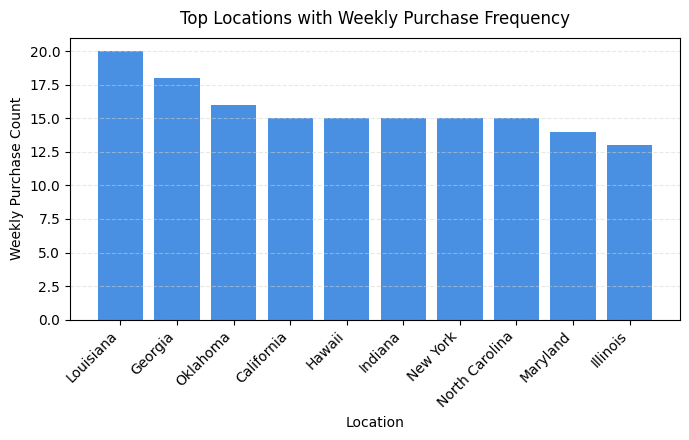

In [40]:
weekly_purchases = df[df['Frequency of Purchases'] == 'Weekly'].groupby('Location').size().reset_index(name='Weekly Purchase Count')
top_locations = weekly_purchases.nlargest(10, 'Weekly Purchase Count')
plt.figure(figsize=(7, 4.5))
plt.bar(top_locations['Location'], top_locations['Weekly Purchase Count'], color='#4A90E2')  # Professional blue tone
plt.title('Top Locations with Weekly Purchase Frequency', fontsize=12, pad=10)
plt.ylabel('Weekly Purchase Count', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#D3D3D3')
plt.tight_layout()
plt.show()

In [41]:
df['Subscription Status'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
correlation = df['Discount Applied'].corr(df['Subscription Status'])
correlation

np.float64(0.7002024919882505)